# Analyzing Customer Churn in the Banking Sector

### The folowing factors provide various insights into the characteristics and behaviors of bank customers that could potentially influence their likelihood of churning (exiting the bank):

1. RowNumber: A sequential identifier for each row in the dataset.

2. CustomerId: Unique identifier for each customer.

3. Surname: Last name of the customer.

4. CreditScore: A numerical value representing the credit score of the customer, indicating their creditworthiness.

5. Geography: The geographical location of the customer (e.g., country or region).

6. Gender: The gender of the customer.

7. Age: The age of the customer.

8. Tenure: The number of years the customer has been associated with the bank.

9. Balance: The account balance of the customer.

10. NumOfProducts: The number of bank products the customer uses.

11. HasCrCard: Whether the customer has a credit card (1 for yes, 0 for no).

12. IsActiveMember: Whether the customer is an active member (1 for yes, 0 for no).

13. EstimatedSalary: The estimated salary of the customer.

14. Exited: The target variable indicating whether the customer exited the bank (1 for yes, 0 for no).

### Loading data and EDA

In [43]:
import pandas as pd
import numpy as np

In [44]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [45]:
df.shape

(10000, 14)

In [46]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [48]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [49]:
print(df.describe())

         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000     

#### Visualization of data

##### 1. Heat map

C:\Users\gcaba\AppData\Local\Temp\ipykernel_18104\3846141992.py:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data[selected_attributes].corr()


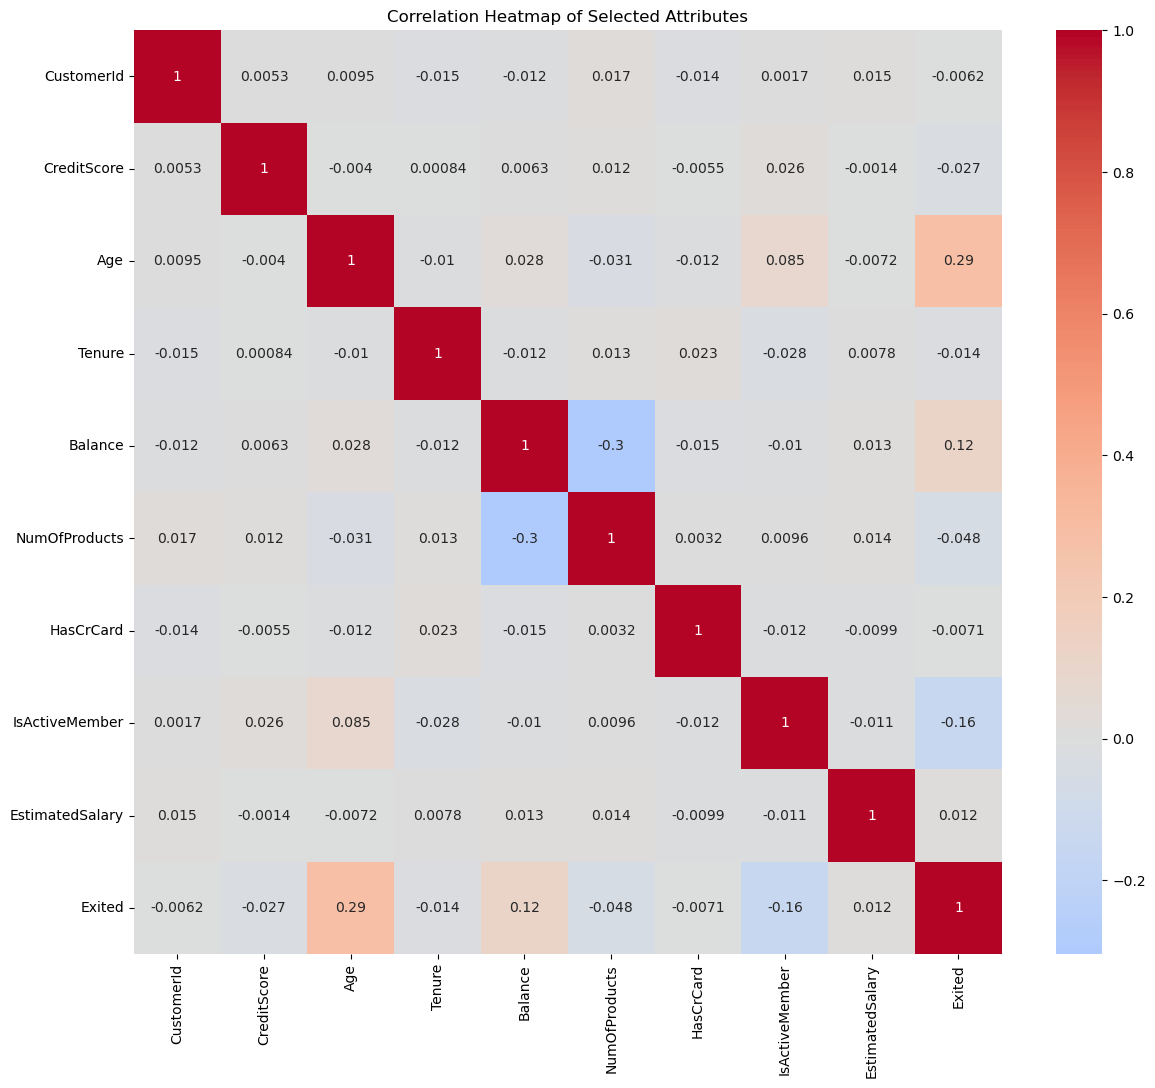

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Churn_Modelling.csv')

# Select attributes
selected_attributes = ['CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']

# Calculate correlation matrix
correlation_matrix = data[selected_attributes].corr()

# Create the heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Selected Attributes')
plt.show()


##### 2. Pie chart

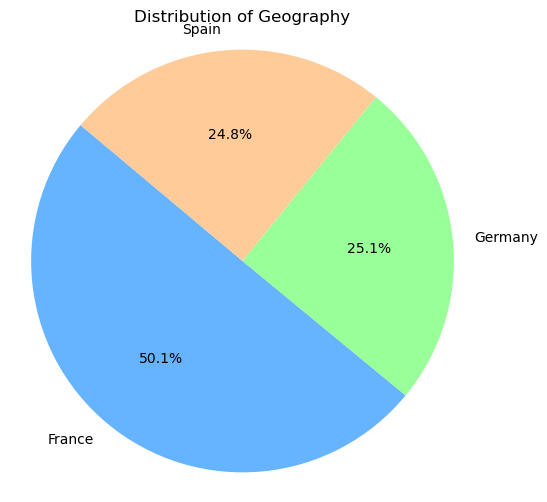

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Churn_Modelling.csv')

# Count the occurrences of each unique value in 'Geography'
geography_counts = data['Geography'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(geography_counts, labels=geography_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff', '#99ff99', '#ffcc99'])
plt.title('Distribution of Geography')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


##### 3. Pair Plot:

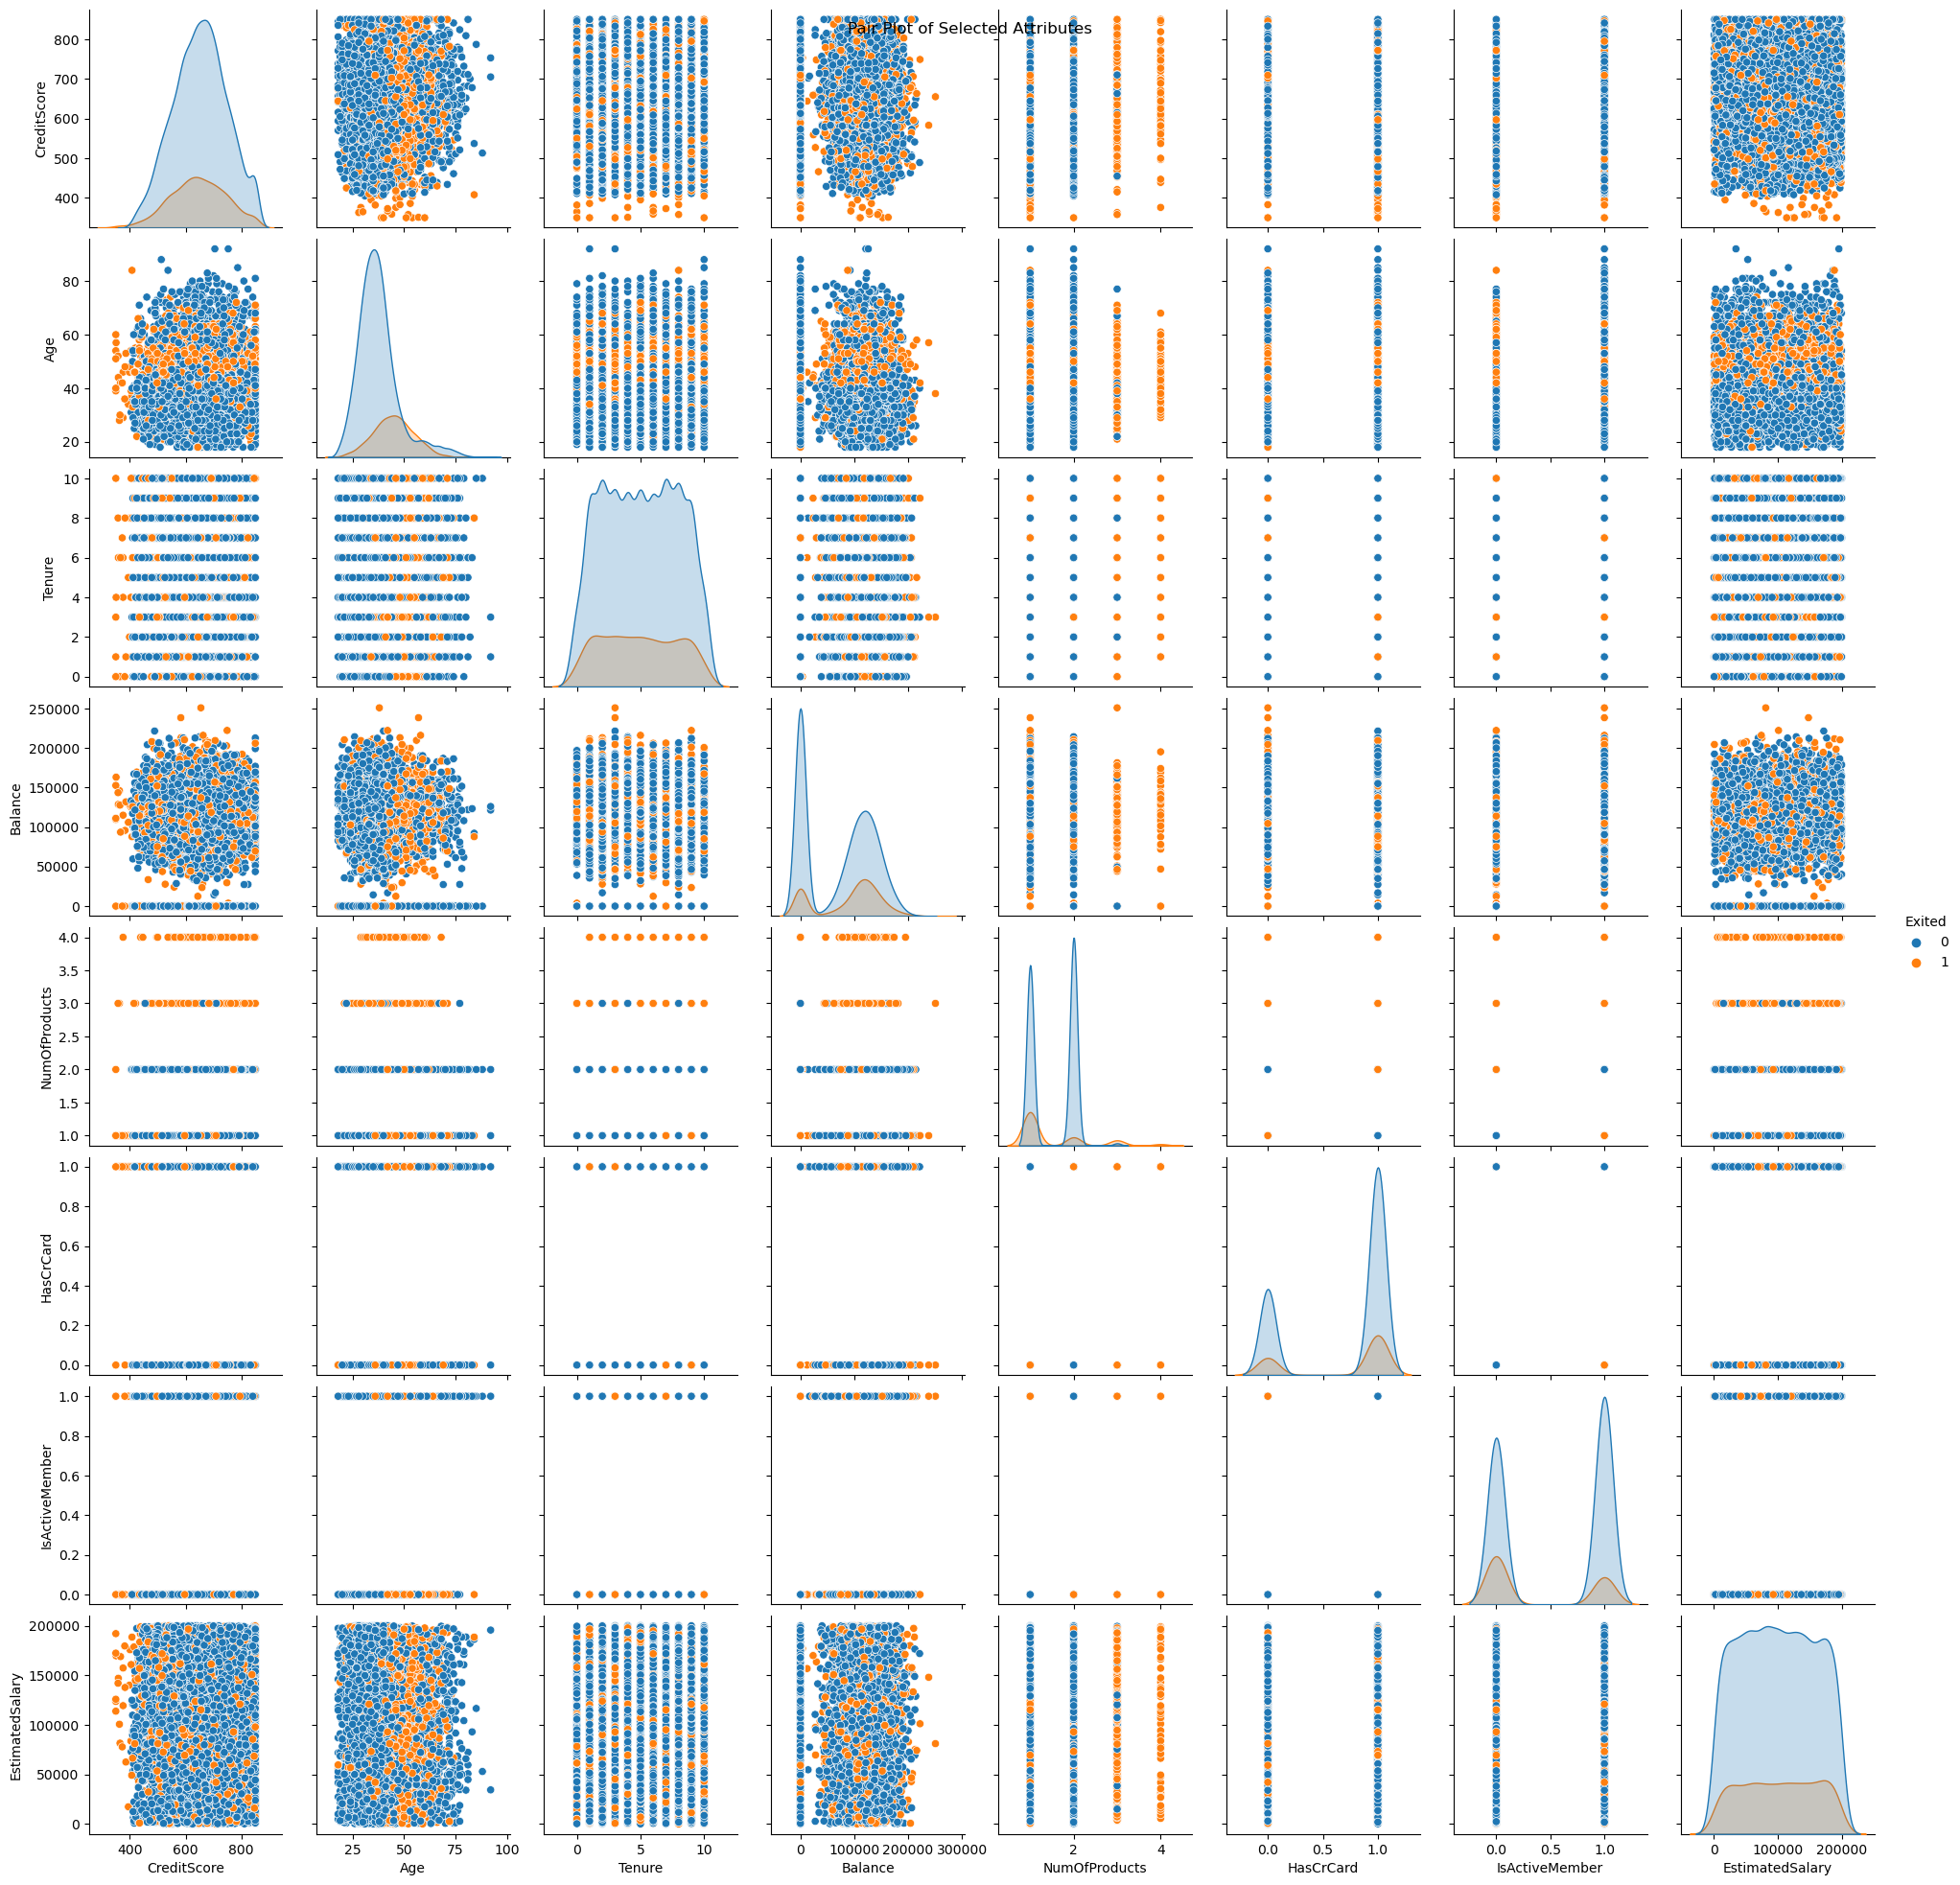

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Churn_Modelling.csv')

# Select attributes for pair plot
selected_attributes = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']

# Create pair plot
sns.pairplot(data[selected_attributes], hue='Exited', diag_kind='kde')
plt.suptitle('Pair Plot of Selected Attributes')
plt.show()


In [50]:
# Printing Unique Values of the categorical variables
print(df['Geography'].unique())
print(df['Gender'].unique())
print(df['NumOfProducts'].unique())
print(df['HasCrCard'].unique())
print(df['IsActiveMember'].unique())

['France' 'Spain' 'Germany']
['Female' 'Male']
[1 3 2 4]
[1 0]
[1 0]


In [51]:
# Checking if there are null values or not
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [52]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [53]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [54]:
# Converting the categorical variables into numerical and avoiding Dummy Varibale Trap
df = pd.get_dummies(df, drop_first=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


### Checking for Bias 

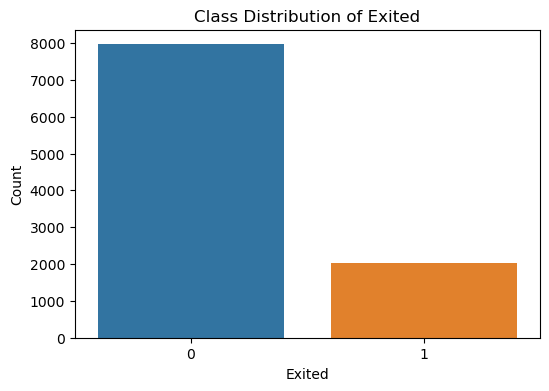

Class Distribution:
0    7963
1    2037
Name: Exited, dtype: int64


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('Churn_Modelling.csv')

class_distribution = data['Exited'].value_counts()

plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Exited')
plt.title('Class Distribution of Exited')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.show()

print("Class Distribution:")
print(class_distribution)


In [14]:
X = df.drop('Exited',axis=1)
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [15]:
y = df['Exited']
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

### Removing the bias using SMOTE method

In [16]:
from imblearn.over_sampling import SMOTE
X_res,y_res = SMOTE().fit_resample(X,y)

In [17]:
y_res.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.2, random_state = 42)

In [19]:
# Standardizing the Dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [20]:
X_train

array([[-0.76113146,  2.10305706, -0.66204194, ...,  1.74852076,
        -0.46313064,  1.18404425],
       [ 1.09573214,  0.0985572 , -1.39741962, ..., -0.571912  ,
        -0.46313064,  1.18404425],
       [-1.87524962,  1.70215708,  0.07333574, ...,  1.74852076,
        -0.46313064, -0.84456303],
       ...,
       [ 0.20006852,  0.19878219,  1.17640226, ..., -0.571912  ,
        -0.46313064,  1.18404425],
       [-0.36791329,  1.5017071 , -1.76510846, ...,  1.74852076,
        -0.46313064, -0.84456303],
       [ 0.52775034,  1.00058213, -1.39741962, ...,  1.74852076,
        -0.46313064,  1.18404425]])

### Building models

#### 1. Logistic regression model

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
log= LogisticRegression()


In [22]:
log.fit(X_res, y_res)


LogisticRegression()

In [23]:

y_pred1 = log.predict(X_test)

C:\Users\gcaba\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [24]:
accuracy_score(y_test, y_pred1)

0.7168863779033271

In [25]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred1)
recall = recall_score(y_test, y_pred1)
f1 = f1_score(y_test, y_pred1)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')

Precision: 0.72
Recall: 0.68
F1-Score: 0.70


In [26]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred1)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.75      0.73      1633
           1       0.72      0.68      0.70      1553

    accuracy                           0.72      3186
   macro avg       0.72      0.72      0.72      3186
weighted avg       0.72      0.72      0.72      3186



#### 2. Random forest model

In [27]:

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred5= rf.predict(X_test)

In [28]:
accuracy_score(y_test,y_pred5)

0.8600125549278091

In [29]:
X_res = sc.fit_transform(X_res)


In [30]:
# Train the Random Forest classifier
rf.fit(X_res, y_res)

RandomForestClassifier()

In [31]:
from sklearn.metrics import classification_report
y_pred_rf = rf.predict(X_test)
report_rf = classification_report(y_test, y_pred_rf)
print("Random Forest Classification Report:\n", report_rf)

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1633
           1       1.00      1.00      1.00      1553

    accuracy                           1.00      3186
   macro avg       1.00      1.00      1.00      3186
weighted avg       1.00      1.00      1.00      3186



#### Visulaization of models

##### 1. ROC-AUC Curve 

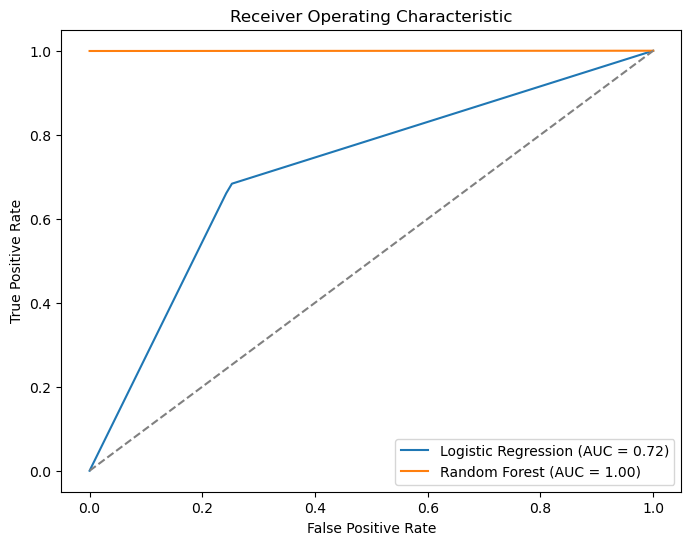

In [32]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# Compute ROC curve and ROC AUC for logistic regression
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred1)
roc_auc_lr = roc_auc_score(y_test, y_pred1)

# Compute ROC curve and ROC AUC for random forest
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)

# Create interpolated ROC curves
tpr_interp_lr = np.interp(np.linspace(0, 1, 100), fpr_lr, tpr_lr)
tpr_interp_rf = np.interp(np.linspace(0, 1, 100), fpr_rf, tpr_rf)

# Plot smooth ROC curves
plt.figure(figsize=(8, 6))
plt.plot(np.linspace(0, 1, 100), tpr_interp_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(np.linspace(0, 1, 100), tpr_interp_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()


##### 2. Confusion Matrix

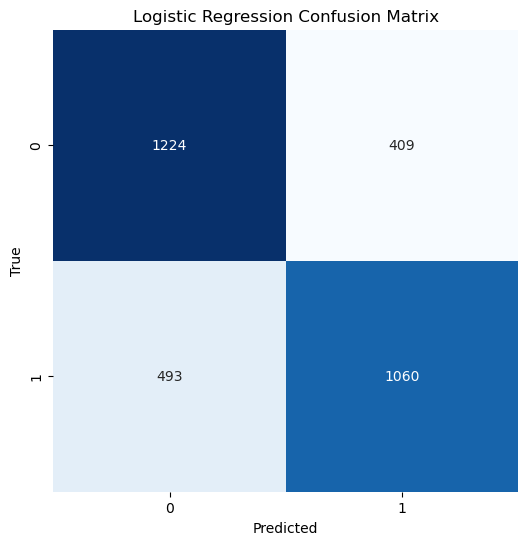

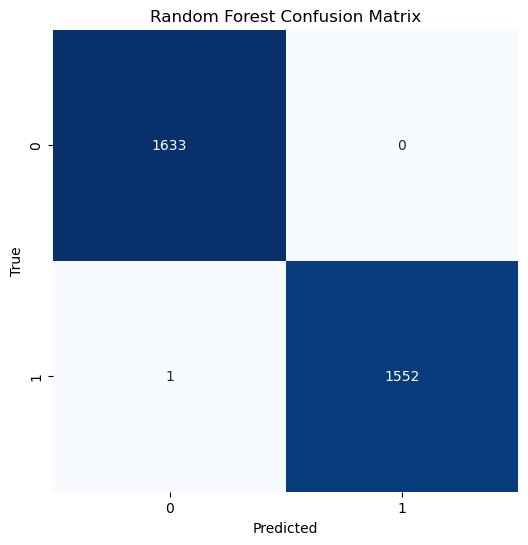

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you have already generated predictions and loaded the true labels
# y_pred1 for logistic regression and y_pred_rf for random forest

# Compute confusion matrices
cm_lr = confusion_matrix(y_test, y_pred1)
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Create a function to plot confusion matrix as a heatmap
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

# Plot confusion matrix for logistic regression
plot_confusion_matrix(cm_lr, "Logistic Regression Confusion Matrix")

# Plot confusion matrix for random forest
plot_confusion_matrix(cm_rf, "Random Forest Confusion Matrix")


### Saving , loading and making predictions from the model

In [34]:
import joblib

In [35]:

# Save the model to a file using joblib
joblib.dump(rf,'churn_predict_model')


['churn_predict_model']

In [36]:

# Load the model from the file
model = joblib.load('churn_predict_model')

In [37]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [38]:
model.predict([[619,42,2,0.0,0,0,0,101348.88,0,0,0]])



array([1], dtype=int64)

In [39]:
# Use the loaded model for predictions
model.predict([[608,41,1,83807.86,1,0,1,112542.58,0,0,0]])

array([0], dtype=int64)

### Pickling the model

In [40]:
import pickle
from sklearn.ensemble import RandomForestClassifier

# Create an instance of the Random Forest classifier
rf = RandomForestClassifier()

# Train the Random Forest classifier
rf.fit(X_train, y_train)

# Pickle the trained Random Forest classifier
with open('RandomForest_Model.pkl', 'wb') as file:
    pickle.dump(rf, file)
